In [1]:
!wget http://t.dripemail2.com/c/eyJhY2NvdW50X2lkIjoiNDc2ODQyOSIsImRlbGl2ZXJ5X2lkIjoiOWp0eTN0MGRndnd5dDM1cGkxamciLCJ1cmwiOiJodHRwOi8vcHlpbWcuY28vdmdnam8_X19zPWo1ZXg4Y21hZXp6YXhteWoyNWhrIn0

--2020-05-13 07:41:53--  http://t.dripemail2.com/c/eyJhY2NvdW50X2lkIjoiNDc2ODQyOSIsImRlbGl2ZXJ5X2lkIjoiOWp0eTN0MGRndnd5dDM1cGkxamciLCJ1cmwiOiJodHRwOi8vcHlpbWcuY28vdmdnam8_X19zPWo1ZXg4Y21hZXp6YXhteWoyNWhrIn0
Resolving t.dripemail2.com (t.dripemail2.com)... 3.219.92.97, 54.175.78.249, 54.175.54.218, ...
Connecting to t.dripemail2.com (t.dripemail2.com)|3.219.92.97|:80... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: http://pyimg.co/vggjo?__s=j5ex8cmaezzaxmyj25hk [following]
--2020-05-13 07:41:53--  http://pyimg.co/vggjo?__s=j5ex8cmaezzaxmyj25hk
Resolving pyimg.co (pyimg.co)... 198.74.56.65
Connecting to pyimg.co (pyimg.co)|198.74.56.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/face-recognition-opencv/face-recognition-opencv.zip [following]
--2020-05-13 07:41:54--  https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/face-recognition-open

In [2]:
!pip install dlib
!pip install face_recognition

     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=a9681d0fadd387e6ccbf860f9113e16afde8f0ff3e34da9af31ae5fc360cf242
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
 !unzip -q /content/eyJhY2NvdW50X2lkIjoiNDc2ODQyOSIsImRlbGl2ZXJ5X2lkIjoiOWp0eTN0MGRndnd5dDM1cGkxamciLCJ1cmwiOiJodHRwOi8vcHlpbWcuY28vdmdnam8_X19zPWo1ZXg4Y21hZXp6YXhteWoyNWhrIn0 

In [0]:
import face_recognition
import dlib
import cv2
import glob
import os

In [0]:
encs = []
names = []

In [0]:
def load_imgs():
  ctr = 0
  for i in glob.glob('/content/face-recognition-opencv/dataset/*/*'):
    ctr+=1
    img = cv2.imread(i)
    img = cv2.resize(img,(256,256))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    boxes = face_recognition.face_locations(img,model = 'cnn')
    enc = face_recognition.face_encodings(img,boxes)
    try:
      encs.append(enc[0])
      names.append(i.split('/')[-2])
    except IndexError:
      continue
  print(ctr)

In [23]:
load_imgs()

218


In [0]:
from collections import Counter

In [46]:
Counter(names)

Counter({'alan_grant': 17,
         'claire_dearing': 33,
         'ellie_sattler': 24,
         'ian_malcolm': 40,
         'john_hammond': 26,
         'owen_grady': 30})

In [0]:
import matplotlib.pyplot as plt

In [0]:
def recog(path):
  img = cv2.imread(path)
  img = cv2.resize(img,(256,256))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  boxes = face_recognition.face_locations(img,model = 'cnn')
  enc = face_recognition.face_encodings(img,boxes)
  find = []
  for e in enc:
    det = []
    comp = face_recognition.compare_faces(encs,e)
    if True in comp:
      for i in range(len(comp)):
        if comp[i]:
          det.append(names[i])
    find.append(Counter(det).most_common()[0][0])
  for ((t,r,b,l),n) in zip(boxes,find):
    cv2.rectangle(img,(l,t),(r,b),(255,0,0),1)
    cv2.putText(img,n,(l,t),cv2.FONT_HERSHEY_PLAIN,1,(0,0,255),1)
  plt.imshow(img)

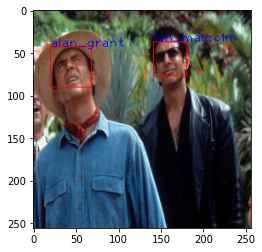

In [54]:
recog('/content/face-recognition-opencv/examples/example_01.png')